# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('https://raw.githubusercontent.com/mchosasih99/dataset/main/Improving%20Employee%20Retention%20by%20Predicting%20Employee%20Attrition%20Using%20Machine%20Learning.xlsx%20-%20hr_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [3]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


## Menghapus Kolom

In [4]:
df.drop(['Username', 'EnterpriseID', 'IkutProgramLOP',
         'NomorHP', 'Email'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


- **`Username, EntrepriseID, NomorHP, Email`** merupakan kolom yang memiliki nilai unik bagi masing masing karyawan, sehingga kolom ini tidak diperlukan.

- **`AlasanResign`** merupakan kolom yang berhubungan langsung dengan kolom target, sehingga nilainya akan memiliki korelasi yang tinggi, sehingga kolom ini tidak diperlukan juga.


- **`IkutProgramLOP`** memiliki null value yang sangat banyak, sehingga kolom ini tidak diperlukan.

## Mengisi Null Value

In [5]:
# Mengisi null value
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(),inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(),inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(0,inplace=True)
df['JumlahKetidakhadiran'].fillna(0,inplace=True)
df['AlasanResign'].fillna('Tidak_Resign', inplace=True)

#Merubah datatype
datatype = ['SkorKepuasanPegawai','JumlahKeikutsertaanProjek',
    'JumlahKeterlambatanSebulanTerakhir',	'JumlahKetidakhadiran']
df[datatype] = df[datatype].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   StatusPernikahan                    287 non-null    object
 1   JenisKelamin                        287 non-null    object
 2   StatusKepegawaian                   287 non-null    object
 3   Pekerjaan                           287 non-null    object
 4   JenjangKarir                        287 non-null    object
 5   PerformancePegawai                  287 non-null    object
 6   AsalDaerah                          287 non-null    object
 7   HiringPlatform                      287 non-null    object
 8   SkorSurveyEngagement                287 non-null    int64 
 9   SkorKepuasanPegawai                 287 non-null    int64 
 10  JumlahKeikutsertaanProjek           287 non-null    int64 
 11  JumlahKeterlambatanSebulanTerakhir  287 non-null    int64 

## Membersihkan Categorical dan Numerical Data

In [6]:
cat = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 
       'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan',
       'AlasanResign','PernahBekerja']
num = ['SkorSurveyEngagement', 'SkorKepuasanPegawai', 
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran']

In [7]:
for i in cat:
  print(df[i].value_counts())
  print("*"*100)

Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64
****************************************************************************************************
Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64
****************************************************************************************************
FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64
****************************************************************************************************
Software Engineer (Back End)      109
Software Engineer (Front End)      72
Software Engineer (Android)        24
Product Design (UI & UX)           24
Product Manager                    17
Data Analyst                       16
Data Engineer                      10
Scrum Master                        3
Software Engineer (iOS)             3
DevOps Engineer                     3
Digital Product Manage

In [8]:
df['Departemen'] = df['Pekerjaan'].replace({'Software Engineer (Back End)':'Software',
                         'Software Engineer (Front End)': 'Software',
                         'Software Engineer (Android)': 'Software',
                         'Software Engineer (iOS)': 'Software',
                         'Product Design (UI & UX)': 'Product',
                         'Product Design (UX Researcher)':'Product',
                         'Product Manager': 'Product',
                         'Data Analyst': 'Data',
                         'Data Engineer': 'Data',
                         'DevOps Engineer': 'Software',
                         'Digital Product Manager': 'Product',
                         'Machine Learning Engineer':'Data',
                         'Software Architect': 'Software'})

df['StatusPernikahan'].replace({'Belum_menikah': 'Tidak_berpasangan',
                                'Menikah': 'Berpasangan',
                                'Bercerai': 'Tidak_berpasangan',
                                '-':'Lainnya'}, inplace=True)
df['AlasanResign'].replace({
    'Product Design (UI & UX)': 'Tidak_cocok'},inplace=True)

df['HiringPlatform'].replace({'On-line_Web_application': 'Other'}, inplace = True)

df.drop(['PernahBekerja'],1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [9]:
df.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Departemen
0,Tidak_berpasangan,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4,0,0,9,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,Software
1,Tidak_berpasangan,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4,4,0,3,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,Data
2,Berpasangan,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3,0,0,11,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,Software
3,Tidak_berpasangan,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3,0,4,6,Sarjana,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,Software
4,Tidak_berpasangan,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3,0,0,11,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,Product


- **`StatusPernikahan, Pekerjaan, HiringPlatform`** dibersihkan untuk mengurangi kompleksitas terhadap model.
- **`PernahBekerja`** dihapus karena hanya memiliki satu unique value (1 dan yes merupakan label yang sama)

In [10]:
for i in num:
  print(df[i].value_counts())
  print("*"*100)

3    132
4     96
2     43
1     14
5      2
Name: SkorSurveyEngagement, dtype: int64
****************************************************************************************************
3    96
5    91
4    90
2     8
1     2
Name: SkorKepuasanPegawai, dtype: int64
****************************************************************************************************
0    224
6     20
5     20
7      9
4      8
3      3
1      1
2      1
8      1
Name: JumlahKeikutsertaanProjek, dtype: int64
****************************************************************************************************
0    256
4      8
3      6
2      6
5      5
6      5
1      1
Name: JumlahKeterlambatanSebulanTerakhir, dtype: int64
****************************************************************************************************
4     20
2     20
15    19
16    17
7     17
14    16
6     16
3     16
13    15
19    15
1     14
17    14
20    13
9     12
11    12
10    10
8     10
5      9
12     7
18     7
0    

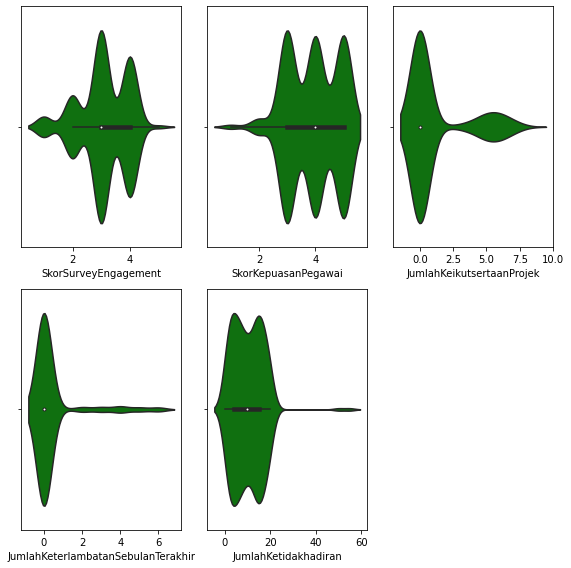

In [11]:
plt.figure(figsize=(8,8))
for i in range(0, len(num)):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x=df[num[i]], color='green')
    plt.tight_layout()

Secara keseluruhan tidak ada value yang aneh di tiap kolom tipe numeric. Hanya saja **`JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, JumlahKetidakhadiran`** memiliki outliers.

## Target Value

In [12]:
df['Resign'] = df['TanggalResign'].apply(lambda x: 0 if x == '-' else 1)

## Merubah Datetime

In [13]:
df.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign,Departemen,Resign
0,Tidak_berpasangan,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4,0,0,9,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-,Software,0
1,Tidak_berpasangan,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4,4,0,3,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16,Data,1
2,Berpasangan,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3,0,0,11,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24,Software,1
3,Tidak_berpasangan,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3,0,4,6,Sarjana,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-,Software,0
4,Tidak_berpasangan,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3,0,0,11,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06,Product,1


In [14]:
# Merubah Datetime
df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'], errors='coerce')

#Extract Kolom Baru
df['JarakResign'] = (df['TanggalResign'] - df['TanggalHiring']).dt.days
df['JarakPenilaian'] = (df['TanggalPenilaianKaryawan'] - df['TanggalHiring']).dt.days

df['JarakResign'].fillna(0, inplace=True)

df.drop('TanggalResign', 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


In [15]:
df

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,Departemen,Resign,JarakResign,JarakPenilaian
0,Tidak_berpasangan,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4,0,0,9,Magister,masih_bekerja,1972-07-01,2011-01-10,2016-02-15,Software,0,0.0,1862
1,Tidak_berpasangan,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4,4,0,3,Sarjana,toxic_culture,1984-04-26,2014-01-06,2020-01-17,Data,1,1622.0,2202
2,Berpasangan,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3,0,0,11,Magister,jam_kerja,1974-01-07,2011-01-10,2016-01-10,Software,1,1353.0,1826
3,Tidak_berpasangan,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3,0,4,6,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2020-02-04,Software,0,0.0,2178
4,Tidak_berpasangan,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3,0,0,11,Sarjana,ganti_karir,1974-11-07,2013-11-11,2020-01-22,Product,1,1760.0,2263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Tidak_berpasangan,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,2,5,0,0,16,Sarjana,Tidak_Resign,1973-12-08,2011-09-26,2016-03-01,Data,0,0.0,1618
283,Lainnya,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,4,5,0,0,11,Sarjana,jam_kerja,1974-12-01,2013-05-13,2020-01-28,Product,1,1647.0,2451
284,Berpasangan,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,2,5,0,0,17,Sarjana,ganti_karir,1969-10-30,2013-11-11,2020-01-21,Software,1,1670.0,2262
285,Tidak_berpasangan,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,4,5,0,0,20,Sarjana,kejelasan_karir,1981-10-01,2011-05-16,2014-04-05,Software,1,2512.0,1055
